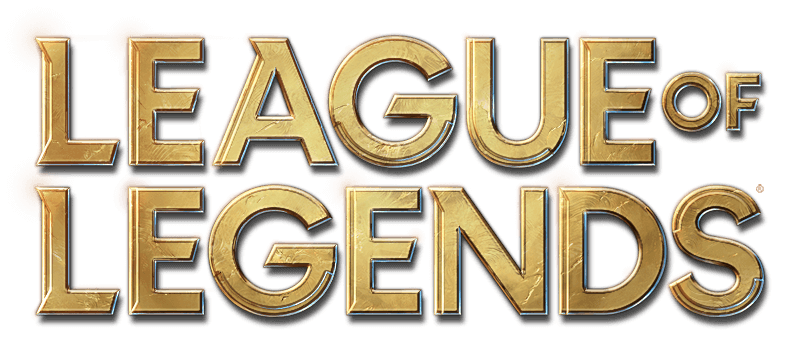

In [1]:
from PIL import Image
img = Image.open("lol.png")
img

# League of Legends Diamond Ranked Games (first 10 min)

## About Dataset

League of Legends is a MOBA (multiplayer online battle arena) where 2 teams (blue and red) face off. 

This dataset contains the first 10min stats of 9879 ranked games from a high ELO. In other words, ordinary players will not be able to play in such a high-ranking game. To an extent, it reduced the deviation from this analysis. 

The goal in the game is to kill minions and opponent champions to gain money for buying better equipments. Whichever team take down the enemy homebase(Nexus) win the game. Either win or lose the game, there's no "tie game".

There are 19 features per team (38 in total) collected after 10 min in-game. This includes kills, deaths, gold, experience, level etc. I will be using part of the data to discover some insight from our EDA.

#### Player distribution in rankings
Iron:  1.7 % <br>
Bronze: 18 % <br>
Silver: 36 % <br>
Gold: 29 % <br>
Platinum: 12 % <br>
**Diamond: 1.6 %** <br>
Master: 0.21 % <br>
Grandmaster: 0.024 % <br>
Challenger: 0.010 % <br>

Data Resource: https://dotesports.com/league-of-legends/news/league-of-legends-ranking-system-explained-17171

### EDA Questions to  be answered

In this notebook, I will be using blue team as a sample to dig into this dataset.

1. What's the winning rate for the each team in this 9879 ranked games dataset?
2. The impact of first blood on winning
3. The impact of total minions killed on winning
4. The impact of death on winning
5. The Kills (Blue & Red team comparison)

LETS GO!

### Import Libraries

In [2]:
# Import data analysis libraries
import pandas as pd
import numpy as np

# Import libraries for visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Read into dataframe
dp = pd.read_csv("lol_10min.csv")  
pd.read_csv("lol_10min.csv") 

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,4527873286,1,17,2,1,7,4,5,1,1,...,0,15246,6.8,16498,229,34,-2519,-2469,22.9,1524.6
9875,4527797466,1,54,0,0,6,4,8,1,1,...,0,15456,7.0,18367,206,56,-782,-888,20.6,1545.6
9876,4527713716,0,23,1,0,6,7,5,0,0,...,0,18319,7.4,19909,261,60,2416,1877,26.1,1831.9
9877,4527628313,0,14,4,1,2,3,3,1,1,...,0,15298,7.2,18314,247,40,839,1085,24.7,1529.8


In [4]:
# check data type
dp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

In [5]:
# Get column names
cols = dp.columns
print(cols)

Index(['gameId', 'blueWins', 'blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')


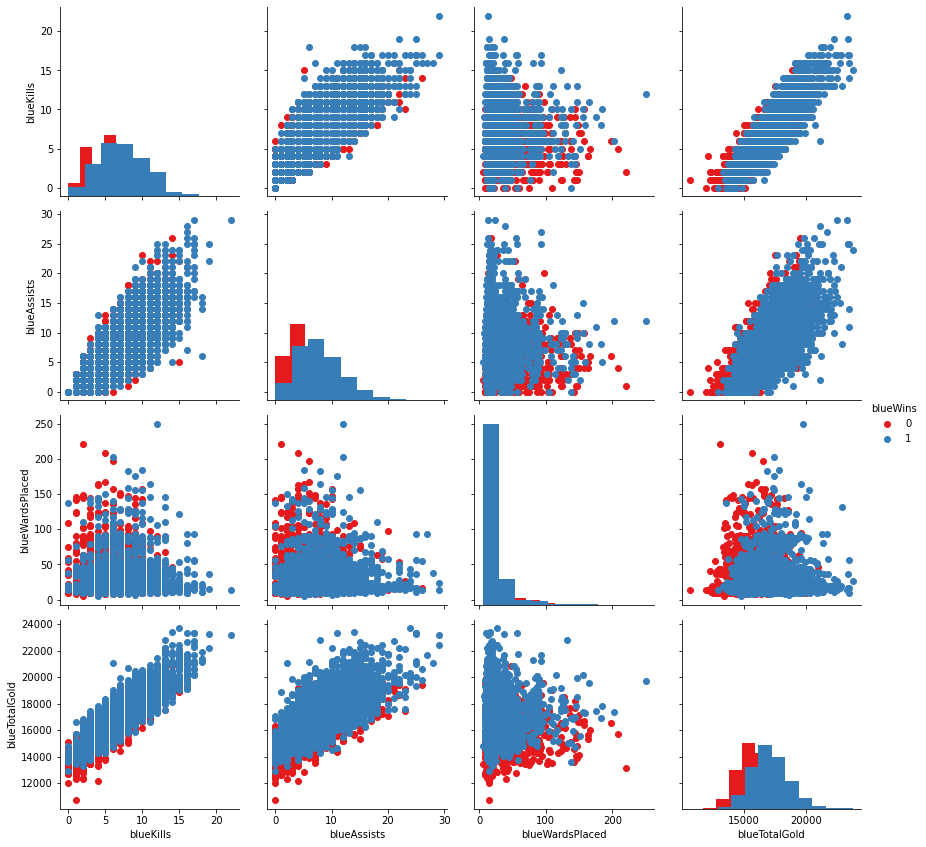

In [6]:
# check the relationship between parameters of blue team features
g = sns.PairGrid(data=dp, vars=['blueKills', 'blueAssists', 'blueWardsPlaced', 'blueTotalGold'], hue='blueWins', height=3, palette='Set1')
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()
plt.show()

### Now Let's do some EDA!

### EDA Q1. What's the winning rate for the blue team in this 9879 games?

In [7]:
Bluewon = dp[dp.blueWins == 1] # 1 = win
Bluewon
# Pulling games that Blue Team won
# 4930 rows = 4930 won game

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
5,4475365709,1,18,0,0,5,3,6,1,1,...,0,15201,7.0,18060,221,59,-698,-101,22.1,1520.1
6,4493010632,1,18,3,1,7,6,7,1,1,...,0,14463,6.4,15404,164,35,-2411,-1563,16.4,1446.3
9,4509433346,1,13,1,1,4,5,5,1,1,...,0,16605,6.8,18379,247,43,1548,1574,24.7,1660.5
12,4515594785,1,18,1,1,7,1,11,1,1,...,0,14591,6.8,17443,240,50,-3274,-1659,24.0,1459.1
14,4516505202,1,15,3,1,4,4,4,0,0,...,0,16192,7.0,18083,242,48,470,187,24.2,1619.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9872,4527650398,1,12,0,1,7,7,9,0,0,...,0,16399,7.0,18001,216,58,-756,-1,21.6,1639.9
9873,4527878058,1,18,2,1,12,6,13,0,0,...,0,15934,6.6,17027,197,38,-2639,-2364,19.7,1593.4
9874,4527873286,1,17,2,1,7,4,5,1,1,...,0,15246,6.8,16498,229,34,-2519,-2469,22.9,1524.6
9875,4527797466,1,54,0,0,6,4,8,1,1,...,0,15456,7.0,18367,206,56,-782,-888,20.6,1545.6


In [8]:
# Blue win games / Total Games

dp['blueWins'].sum() / dp.shape[0]

0.4990383642069035

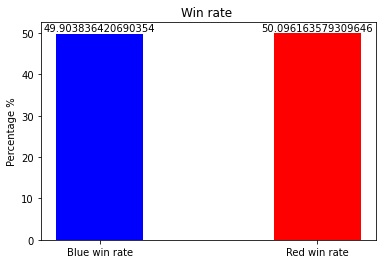

In [27]:
x = ["Blue win rate", "Red win rate"]
x1 = (dp['blueWins'].sum() / dp.shape[0])*100
x2 = 100-dp['blueWins'].sum() / dp.shape[0]*100  
c = ["blue", "red"]
plt.bar(x,y,width=0.4,color = c)
plt.ylabel("Percentage %")
plt.title("Win rate ")
plt.text(0,y[0],(dp['blueWins'].sum() / dp.shape[0])*100,ha="center",va="bottom")
plt.text(1,y[1],100-dp['blueWins'].sum() / dp.shape[0]*100 ,ha="center",va="bottom")
plt.show()

With the **49.9%** blue team win rate, we can see that the win rate will be roughly the same no matter which team you join.

### EDA  Q2. The impact of first blood on winning

In [10]:
#First blood = First kill in the game
#Total games the blue team gets their first blood and wins the game

Bluewon_firstblood = dp[(dp.blueWins == 1) & (dp.blueFirstBlood == 1)] 
Bluewon_firstblood

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
6,4493010632,1,18,3,1,7,6,7,1,1,...,0,14463,6.4,15404,164,35,-2411,-1563,16.4,1446.3
9,4509433346,1,13,1,1,4,5,5,1,1,...,0,16605,6.8,18379,247,43,1548,1574,24.7,1660.5
12,4515594785,1,18,1,1,7,1,11,1,1,...,0,14591,6.8,17443,240,50,-3274,-1659,24.0,1459.1
14,4516505202,1,15,3,1,4,4,4,0,0,...,0,16192,7.0,18083,242,48,470,187,24.2,1619.2
16,4523758462,1,14,1,1,10,2,8,0,0,...,0,14505,6.8,17484,210,64,-5228,-3378,21.0,1450.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9870,4527811425,1,46,2,1,5,3,2,0,0,...,0,14949,6.8,18046,202,64,-1974,-1712,20.2,1494.9
9872,4527650398,1,12,0,1,7,7,9,0,0,...,0,16399,7.0,18001,216,58,-756,-1,21.6,1639.9
9873,4527878058,1,18,2,1,12,6,13,0,0,...,0,15934,6.6,17027,197,38,-2639,-2364,19.7,1593.4
9874,4527873286,1,17,2,1,7,4,5,1,1,...,0,15246,6.8,16498,229,34,-2519,-2469,22.9,1524.6


In [11]:
len(Bluewon_firstblood) / len(Bluewon) # Get the percentage of the total blue win games with first blood

0.6058823529411764

<function matplotlib.pyplot.show(close=None, block=None)>

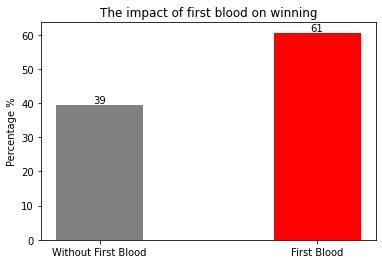

In [12]:
x = ["Without First Blood", "First Blood"]
x1 = (len(Bluewon_firstblood) / len(Bluewon) )*100  #first blood
x2 = 100- (len(Bluewon_firstblood) / len(Bluewon) )*100 #Without first blood
y = [x2, x1]
c = ["grey", "red"]
plt.bar(x,y,width=0.4,color = c)
plt.text(0,y[0],round(100- (len(Bluewon_firstblood) / len(Bluewon) )*100),ha="center",va="bottom")
plt.text(1,y[1],round((len(Bluewon_firstblood) / len(Bluewon) )*100),ha="center",va="bottom")
plt.ylabel("Percentage %")
plt.title("The impact of first blood on winning")
plt.show

The chance of the blue team winning if they got First Blood is around 61%

### EDA Q3. The impact of minions killed on winning

In [13]:
# 1. Find the average num of minions killed in all games 
# 2. Count how many games above / below average kill
# 3. Compare above/below average minions killed win rate 

In [14]:
mk = dp.sum() 
AVG_Blue_sum_of_mk = (mk.blueTotalMinionsKilled) / len(dp) #Total minions killed / 9879 games = Blue team average minions killed

print(AVG_Blue_sum_of_mk)

216.6995647332726


In [15]:
 #Count how many games above average minion killed & win the game 
Above_win = dp[(dp.blueWins == 1) & (dp.blueTotalMinionsKilled > 216.6995647332726)]


#Minion killed above average win rate
Above_winrate = (len(Above_win) / len(Bluewon))
print(Above_winrate)

0.6139959432048682


In [16]:
#Count how many games below average minion killed & win the game 
Below_win = dp[(dp.blueWins == 1) & (dp.blueTotalMinionsKilled < 216.6995647332726)] 


#Minion killed below average win rate
Below_winrate = (len(Below_win) / len(Bluewon))
print(Below_winrate)

0.38600405679513183


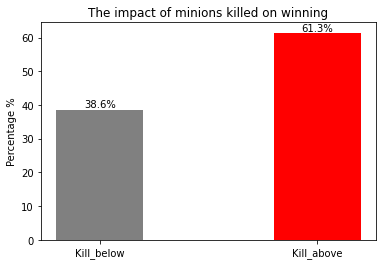

In [17]:
x = ["Kill_below", "Kill_above"]
x1 = (len(Above_win) / len(Bluewon))*100  #first blood
x2 = (len(Below_win) / len(Bluewon))*100 #Without first blood
y = [x2, x1]
c = ["grey", "red"]
plt.bar(x,y,width=0.4,color = c,  )
plt.text(0,y[0],'38.6%',ha="center",va="bottom")
plt.text(1,y[1],'61.3%',ha="center",va="bottom")
plt.ylabel("Percentage %")
plt.title("The impact of minions killed on winning")
plt.show()

**61.3%(Above_winrate)** v.s **38.6%(Below_winrate)**

Killing more than average minions(216) is more likely to win the game. I recommend that players focus more on killing the minions to build up their gold earning in the first 10 mins. The more minions a team/player kills, the more gold they will earn in the game to faster build up their champions.

### EDA Q4. The impact of death on winning

In [18]:
# Assumption - The more death each team has, the winrate will decrease relatively 

In [19]:
death_max = dp['blueDeaths'].max(axis=0)   # Max death num in blue team is 22
death_min = dp['blueDeaths'].min(axis=0)   # Min death num in blue team is 0

In [20]:
dp.groupby('blueDeaths')['blueWins'].mean() 

#Grouping by the death total, and AVG by total Blue wins

blueDeaths
0     0.861111
1     0.844444
2     0.757877
3     0.675589
4     0.647830
5     0.543624
6     0.508894
7     0.437710
8     0.353503
9     0.320163
10    0.309717
11    0.193353
12    0.161137
13    0.175439
14    0.106061
15    0.062500
16    0.050000
17    0.625000
18    0.000000
19    0.000000
22    0.000000
Name: blueWins, dtype: float64

The winrate falls when the death number increased.

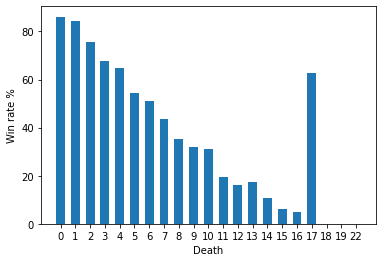

In [21]:
x = ["0","1", "2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","22"]
x0 =86.11
x1 =84.44
x2 =75.78
x3 =67.55
x4 =64.78
x5 =54.36
x6 =50.88
x7 =43.77
x8 =35.35
x9 =32.01
x10 =30.97
x11 =19.33
x12 =16.11
x13 =17.54
x14 =10.60
x15 =6.25
x16 =5.00
x17 =62.50
x18 =0
x19 =0
x22 =0
y = [x0, x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x22]
plt.bar(x,y,width=0.6)
plt.ylabel("Win rate %")
plt.xlabel("Death")
plt.show()

##### How come Death 17 didn't follow the pattern? Is it because there are any errors in this dataset? Let's find out!

In [22]:
# Let's call "blueDeaths == 17" out and see what's going on
dp[dp.blueDeaths == 17] 

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
113,4459740551,0,17,1,1,9,17,17,0,0,...,0,20721,7.0,18207,211,40,3887,3392,21.1,2072.1
757,4519070159,1,16,2,0,14,17,18,1,0,...,0,19549,7.0,17869,185,60,524,904,18.5,1954.9
4100,4419367000,1,41,3,0,4,17,4,0,0,...,0,20391,7.4,19685,204,48,4903,3146,20.4,2039.1
4397,4520635359,1,16,1,1,7,17,8,1,0,...,0,21115,7.2,19590,230,56,4876,3481,23.0,2111.5
7303,4453137700,1,15,2,0,8,17,7,0,0,...,0,19645,6.8,17932,186,36,2089,835,18.6,1964.5
8358,4519379201,1,53,2,0,7,17,5,0,0,...,0,20396,7.0,18545,228,38,4732,1805,22.8,2039.6
8837,4526030769,0,14,1,0,5,17,3,0,0,...,0,19784,7.2,18776,192,48,5290,3110,19.2,1978.4
9574,4519844480,0,41,0,0,4,17,4,0,0,...,0,21103,7.0,18593,194,28,6265,3518,19.4,2110.3


### EDA Q5. The Kills (Blue & Red team comparison)

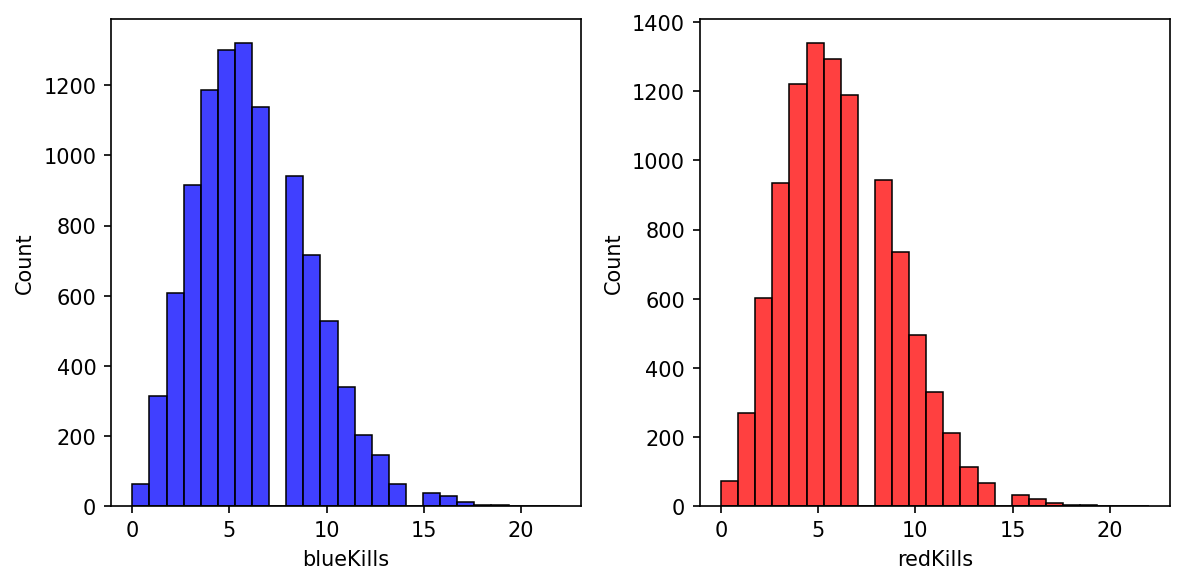

In [23]:
fig, ax = plt.subplots(ncols=2, figsize=(8,4), dpi=150)
sns.histplot(data=dp, x="blueKills", bins=25, ax=ax[0], color="b")
sns.histplot(data=dp, x="redKills", bins=25, ax=ax[1], color="r")
plt.tight_layout()

The kills that gets from both team are almost identical 

# Conclusion

We have shown different relations between data and how are they affected to the final result. From perspective of blue team, how to play to win the game?

#### 1.  The team you joined in a game doesn't affect your win rate. So do your best in the game, don't blame your teammate because you are just another piece of data in big data.


#### 2. First blood plays a huge role in the early game. It creates financial gaps between you and your opponents and reduces EXP your opponents gained from the early game. (The minion you kill, the more EXP you gain from it. Once you die, you will respawn in your Nexus. It creates a huge impact on gaining EXP from minions) 

#### 3. Less death = Higher win rate